In [1]:
# to explore trained models

In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

In [4]:
# plot loss curves

['train_loss.txt', 'best_model.pt', 'config.yml', 'val_loss.txt']

In [64]:
def plot_train(log_path):
    with open(os.path.join(log_path, 'train_loss.txt')) as f:
        tl = f.readlines()
    plt.plot([float(x) for x in tl][:100])
    #plt.plot(np.arange(40), np.linspace(200, 200, 40))
    plt.title('Train Loss')

In [65]:
log_paths = ['/juice/scr/rjcaste/curis/wavegenie/logs/2020-07-13 20:08:51',
             '/juice/scr/rjcaste/curis/wavegenie/logs/2020-07-13 20:01:41']

In [66]:
with open(os.path.join(log_paths[-1], 'train_loss.txt')) as f:
    tl = f.readlines()

In [69]:
import ddsp
from scipy.io.wavfile import read as wavread

In [71]:
audio = wavread('20af160e2b6d96f89016425f2e776910-35.wav')[1]

/u/nlp/anaconda/main/anaconda3/envs/wavegenie37/lib/python3.7/site-packages/librosa/core/time_frequency.py:1208: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3]))


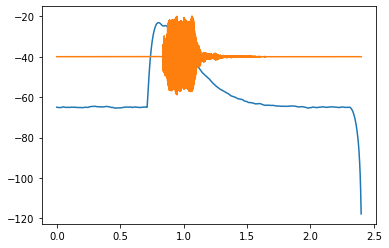

In [79]:
plt.plot(np.linspace(0, 2.4, 604), ddsp.spectral_ops.compute_loudness(audio))
plt.plot(np.linspace(0, 2.4, audio.shape[0]), 20 * audio - 40)

[None, None]

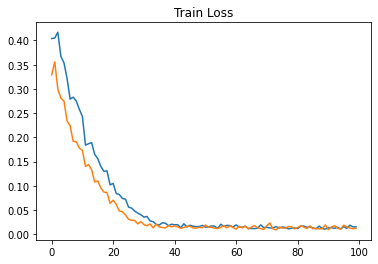

In [67]:
[plot_train(log_path) for log_path in log_paths]

In [5]:
with open(os.path.join(log_path, 'train_loss.txt')) as f:
    tl = f.readlines()

Text(0.5, 1.0, 'Train Loss')

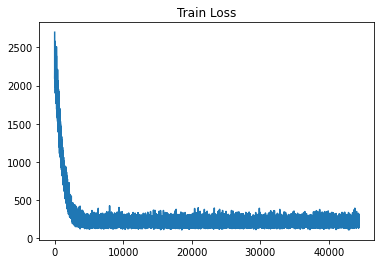

In [39]:
plt.plot([float(x) for x in tl])
#plt.plot(np.arange(40), np.linspace(200, 200, 40))
plt.title('Train Loss')

In [21]:
np.array([float(x) for x in tl])[5000:].mean()

192.2898237952572

In [11]:
with open(os.path.join(log_path, 'val_loss.txt')) as f:
    vl = f.readlines()

Text(0.5, 1.0, 'Validation Loss')

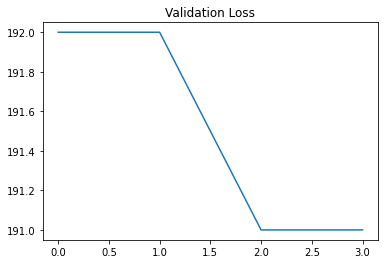

In [41]:
plt.plot([float(x.split(':')[1]) for x in vl])
plt.title('Validation Loss')

In [22]:
# load in best model

In [24]:
model = torch.load(os.path.join(log_path, 'best_model.pt'))

Text(0.5, 1.0, 'Model Weights')

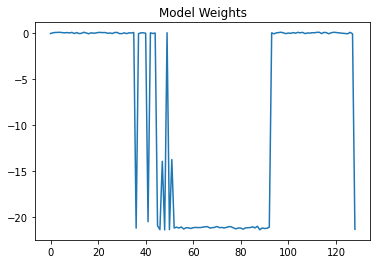

In [42]:
plt.plot(np.array(model['weight'].flatten().cpu()))
plt.title('Model Weights')

In [45]:
model['weight'].flatten()[0]

tensor(-0.0537, device='cuda:0')

In [34]:
model['bias']

tensor([-26.1709], device='cuda:0')